<a href="https://colab.research.google.com/github/sidpatondikar/Capstone-Cardiovascular-Risk-Prediction/blob/main/Cardiovasuclar_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [98]:
df = pd.read_csv('cardiovascular_risk_data.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [99]:
df.shape

(3390, 17)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [101]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [102]:
df.describe(include='object')

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [103]:
#Unique values in all the columns
for col in df.columns.tolist():
  print(f'Unique values in {col} is : {df[col].nunique()}')

Unique values in id is : 3390
Unique values in age is : 39
Unique values in education is : 4
Unique values in sex is : 2
Unique values in is_smoking is : 2
Unique values in cigsPerDay is : 32
Unique values in BPMeds is : 2
Unique values in prevalentStroke is : 2
Unique values in prevalentHyp is : 2
Unique values in diabetes is : 2
Unique values in totChol is : 240
Unique values in sysBP is : 226
Unique values in diaBP is : 142
Unique values in BMI is : 1259
Unique values in heartRate is : 68
Unique values in glucose is : 132
Unique values in TenYearCHD is : 2


In [104]:
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

<Axes: >

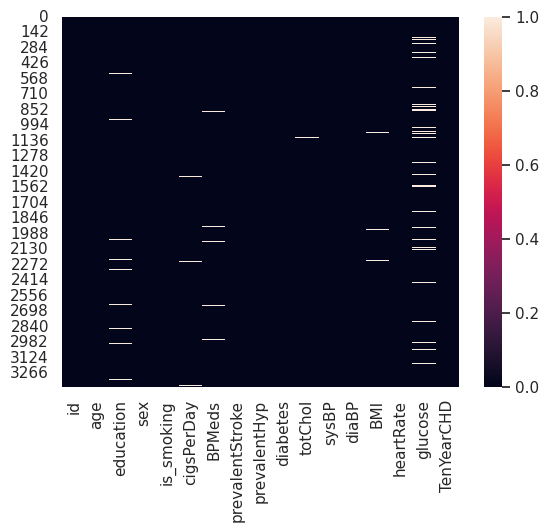

In [105]:
sns.heatmap(df.isnull())

In [106]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [107]:
df.rename(columns={'prevalentStroke':'Had_stroke','prevalentHyp':'Had_hypertension','totChol':'Total_cholestrol',
                   'sysBP':'Systolic_BP','diaBP':'Diastolic_BP'},inplace=True)

In [108]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'Had_stroke', 'Had_hypertension', 'diabetes', 'Total_cholestrol',
       'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [109]:
categorical_var = ['education','sex','is_smoking','BPMeds','Had_stroke','Had_stroke','diabetes']
continous_var = ['id','age','cigsPerDay','Total_cholestrol','Systolic_BP','Diastolic_BP','BMI','heartRate','glucose']
target_var = ['TenYearCHD']

In [110]:
#Creating List of Null values for Categorical and Continuos COlumns
cat_null_cols = ['education','BPMeds']
con_null_cols = ['cigsPerDay','Total_cholestrol','BMI','heartRate','glucose']

In [111]:
#Label Encoding Categorical columns sex and is_smoking
# df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)
# df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [112]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,Had_stroke,Had_hypertension,diabetes,Total_cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [113]:
df['education'].mode()[0]

1.0

In [114]:
# Replacing all null values in Categorical Columns with mode
for i in cat_null_cols:
  df[i] = df[i].fillna(df[i].mode()[0])

df.isnull().sum().sort_values(ascending=False)

glucose             304
Total_cholestrol     38
cigsPerDay           22
BMI                  14
heartRate             1
id                    0
diabetes              0
Diastolic_BP          0
Systolic_BP           0
Had_hypertension      0
age                   0
Had_stroke            0
BPMeds                0
is_smoking            0
sex                   0
education             0
TenYearCHD            0
dtype: int64

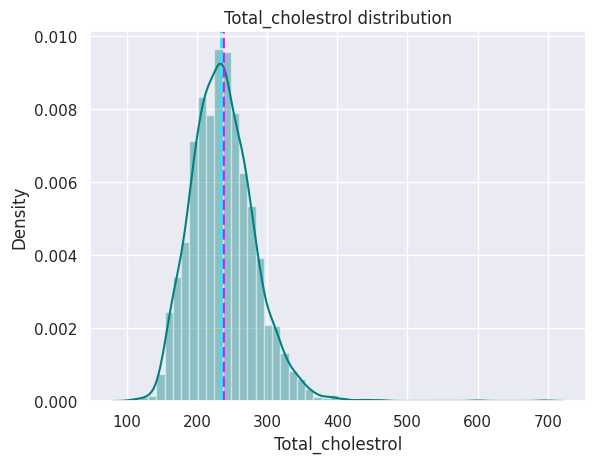

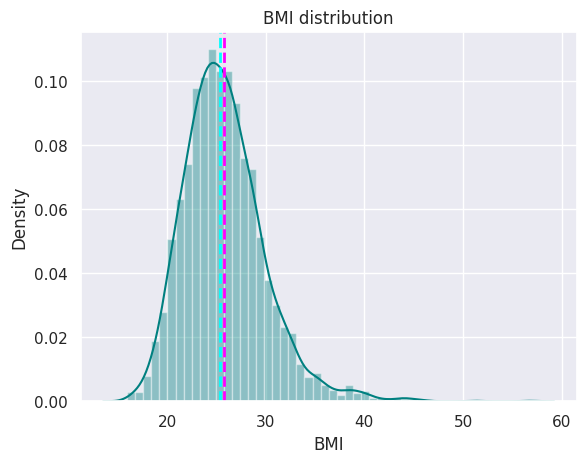

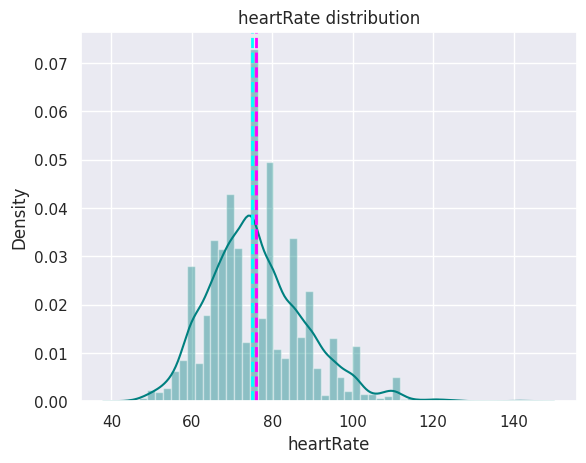

In [115]:
#For continuos variable null values, plotting distribution and boxplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()


for i,col in enumerate(con_null_cols[1:-1]):
  sns.distplot(df[col],color='teal')
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

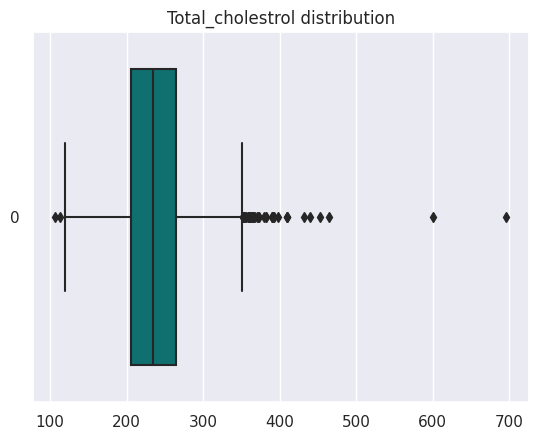

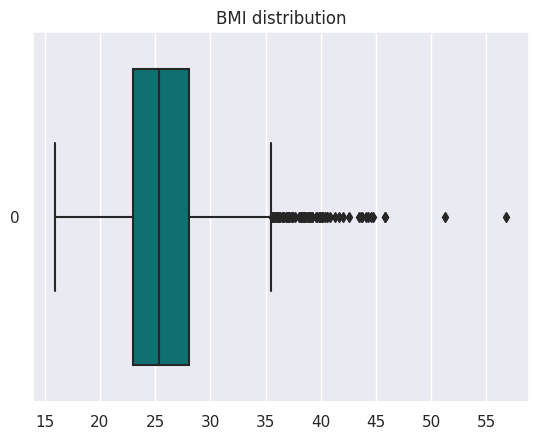

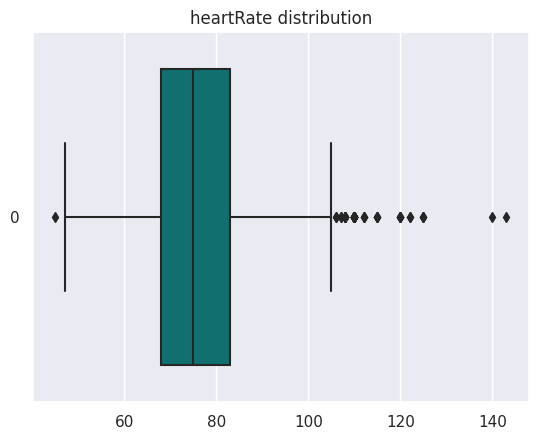

In [116]:
for i,col in enumerate(con_null_cols[1:-1]):
  sns.boxplot(df[col],orient='h',color='teal')
  plt.title(col+' distribution')
  plt.show()

Total_cholestrol, BMI and heartRate columns are positively skewed and have some outliers as well. Hence, for these columns, imputing the null values with median values

In [117]:
df['BMI'].median()

25.38

In [118]:
for i in con_null_cols[1:-1]:
  df[i] = df[i].fillna(df[i].median())

df.isnull().sum().sort_values(ascending=False)

glucose             304
cigsPerDay           22
id                    0
diabetes              0
heartRate             0
BMI                   0
Diastolic_BP          0
Systolic_BP           0
Total_cholestrol      0
Had_hypertension      0
age                   0
Had_stroke            0
BPMeds                0
is_smoking            0
sex                   0
education             0
TenYearCHD            0
dtype: int64

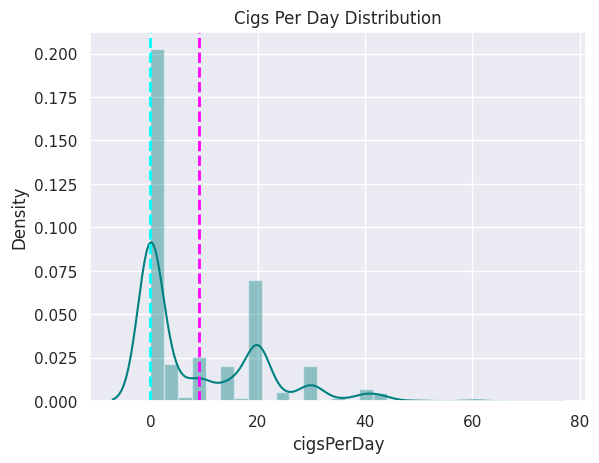

In [119]:
#For cigPerDay columns

sns.distplot(df['cigsPerDay'],color='teal')
plt.axvline(df['cigsPerDay'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['cigsPerDay'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs Per Day Distribution')
plt.show()

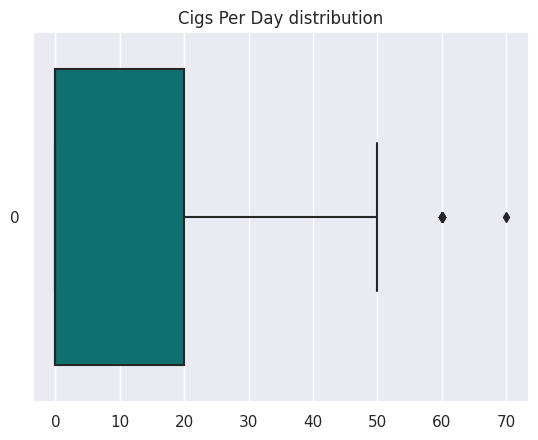

In [120]:
sns.boxplot(df['cigsPerDay'],orient='h',color='teal')
plt.title('Cigs Per Day distribution')
plt.show()

cigPerDay columns is also positively skewed and has some outliers, hence replacing the null values with median values for people who smoke

In [121]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[(df['is_smoking']=='YES')]['cigsPerDay'].median())

df.isnull().sum()

id                    0
age                   0
education             0
sex                   0
is_smoking            0
cigsPerDay            0
BPMeds                0
Had_stroke            0
Had_hypertension      0
diabetes              0
Total_cholestrol      0
Systolic_BP           0
Diastolic_BP          0
BMI                   0
heartRate             0
glucose             304
TenYearCHD            0
dtype: int64

In [124]:
#Checking for possible wrong values

# Number of cigs per day > 0 but the person is non smoker
df[(df['cigsPerDay']>0) & (df['is_smoking']=='NO')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,Had_stroke,Had_hypertension,diabetes,Total_cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD


In [125]:
#Checking for possible wrong values

# Number of cigs per day = 0 but the person is smoker
df[(df['cigsPerDay']==0) & (df['is_smoking']=='YES')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,Had_stroke,Had_hypertension,diabetes,Total_cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD


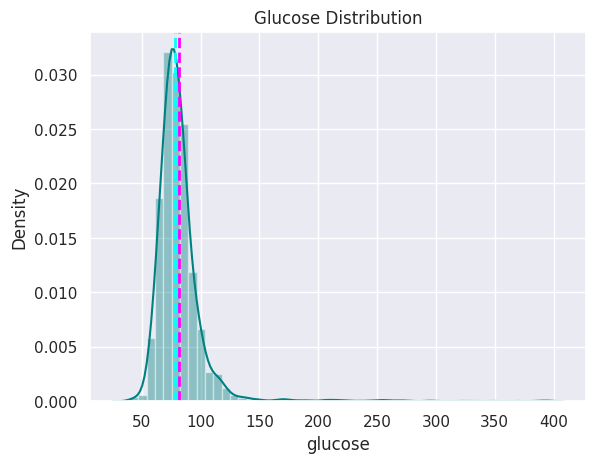

In [127]:
#For Glucose Column

sns.distplot(df['glucose'],color='teal')
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose Distribution')
plt.show()

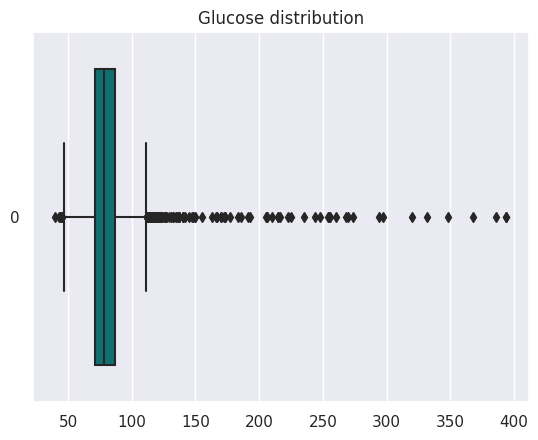

In [126]:
sns.boxplot(df['glucose'],orient='h',color='teal')
plt.title('Glucose distribution')
plt.show()

Glucose is also positively skewed and has lot of outlier values.

As the number of null values in glucose is high, so replacing null values with just one single median value is not benefitial. We can instead use KNN Imputer for filling null values

In [128]:
from sklearn.impute import KNNImputer

In [133]:
#Label Encoding Categorical columns sex and is_smoking
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [134]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [135]:
df.isnull().sum()

id                  0
age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
Had_stroke          0
Had_hypertension    0
diabetes            0
Total_cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64